In [18]:
import pandas as pd
import seaborn as sns
import matplotlib 
listings=pd.read_csv('~/airbnb/listings.csv.zip')

In [19]:
type(listings.iloc[0,60])

str

In [20]:
#Explorer all listed prices and identify the outliers
listings['price']=listings['price'].str.replace('$','')
listings['price']=pd.to_numeric(listings['price'],errors='coerce')

In [21]:
listings['price'].describe()

count    3573.000000
mean      169.072768
std       111.677022
min        10.000000
25%        85.000000
50%       150.000000
75%       220.000000
max       999.000000
Name: price, dtype: float64

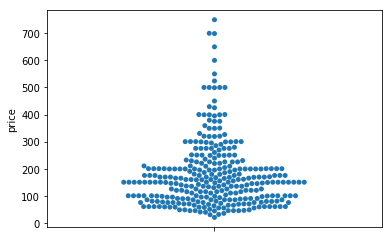

In [22]:
%matplotlib inline
price=listings['price']
sns.swarmplot(y=price.sample(300));

In [23]:
# Most of the prices listed are well below $500, consider only use price data below $500
listings_new=listings.query('price<500')

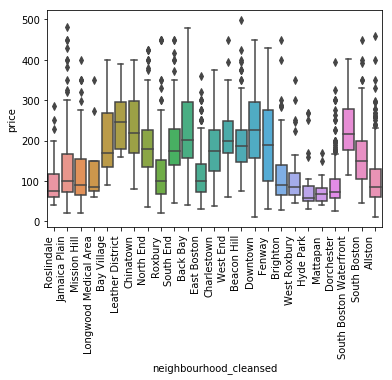

In [24]:
# Explorer the relationship between price and neighbourhood
import matplotlib.pyplot as plt
sns.boxplot(x='neighbourhood_cleansed',y='price',data=listings_new)
ax=plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')
plt.show()

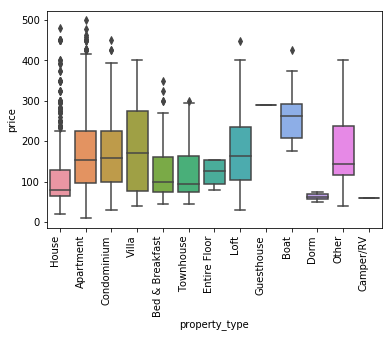

In [25]:
# Explorer the relationship between price and property type
sns.boxplot(x='property_type',y='price',data=listings_new)
ax=plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')
plt.show()

In [26]:
price_property=listings_new[['price','property_type']]
price_property_mean=price_property.groupby('property_type').mean().round(2)
price_property_mean # check the mean listing price for each room type

,price
property_type,
Apartment,168.34
Bed & Breakfast,129.37
Boat,268.83
Camper/RV,60.00
Condominium,172.97
Dorm,62.50
Entire Floor,122.00
Guesthouse,289.00
House,113.70


In [27]:
# Explorer the relationship between price and number of bedrooms & bathrooms
room_price=listings_new[['bathrooms','bedrooms','price']]

In [28]:
import numpy as np
temp=pd.pivot_table(room_price, index=['bedrooms'],columns=['bathrooms'],aggfunc=[np.mean]).round(2)

In [29]:
temp

mean                                                               \
          price                                                                
bathrooms   0.0    0.5     1.0     1.5     2.0     2.5     3.0    3.5    4.0   
bedrooms                                                                       
0.0        60.0    NaN  153.80  200.00     NaN     NaN     NaN  450.0    NaN   
1.0        96.2  56.71  134.91   95.40   90.95   86.52   97.86   77.5    NaN   
2.0         NaN    NaN  219.89  266.41  265.31  250.50     NaN    NaN    NaN   
3.0         NaN    NaN  214.84  274.94  271.22  302.91  389.40  400.0    NaN   
4.0         NaN    NaN  221.75  279.33  289.20  355.00  250.00  250.0  325.0   
5.0         NaN    NaN  100.00  350.00  310.17  322.50  259.00  450.0    NaN   

                          
                          
bathrooms     5.0    6.0  
bedrooms                  
0.0           NaN    NaN  
1.0        106.25  163.0  
2.0        399.00    NaN  
3.0           NaN    NaN  
4.0           NaN    NaN  
5.0           NaN    NaN

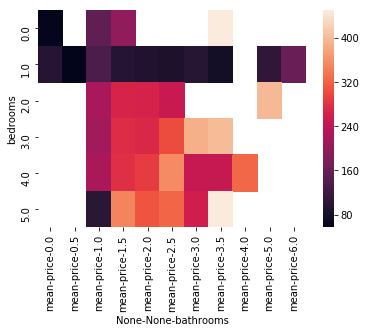

In [30]:
sns.heatmap(temp)

C:\Users\sorav\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\sorav\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


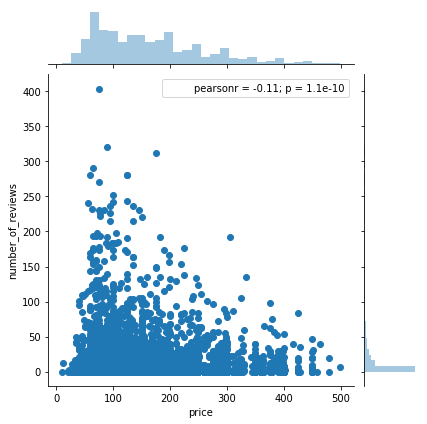

In [31]:
# Explorer the relationship between number of reviews and price
reviews=listings_new[['price','number_of_reviews']]
sns.jointplot('price','number_of_reviews',data=reviews)

### 3.Conclusion

- Most of the rooms have listing price below $300/night <br>
- Leather District, South Waterfront, Downtonw area have the highest median listing prices.<br>
- Hyde Park, Mattapan and Dorchester areas have the lowest median listing prices.<br> 
- Rooms in boats have the highest median listing price, rooms in dorms have the lowest median listing price.<br>
- Number of reviews do not affect the room price.<br> 